In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#loading the dataset
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
X_val = pd.read_csv('X_val.csv')
Y_train = pd.read_csv('Y_train.csv')
Y_test = pd.read_csv('Y_test.csv')
Y_val = pd.read_csv('Y_val.csv')

In [57]:
#dropping unneccessary columns
X_train.drop(columns=['state','city'], inplace=True)
X_test.drop(columns=['state','city'], inplace=True)
X_val.drop(columns=['state','city'], inplace=True)

In [58]:
X_train.shape

(90207, 16)

In [59]:
X_train.describe

<bound method NDFrame.describe of        review_count_x  avg_review_stars  review_count_per_bussiness  \
0                  20          1.850000                   44.100000   
1                   8          3.125000                   57.750000   
2                 219          3.283843                   74.519651   
3                   6          4.666667                   11.000000   
4                   6          5.000000                    7.333333   
...               ...               ...                         ...   
90202              17          3.111111                  567.444444   
90203               7          4.000000                  176.000000   
90204              11          2.333333                  225.333333   
90205               8          4.555556                   14.111111   
90206               6          3.000000                   30.333333   

       checkin_count  tip_count  total_compliments  RestaurantsDelivery  \
0               10.0        0.0                0.0                    1   
1                5.0        0.0                0.0                    0   
2              195.0       13.0                0.0                    1   
3                2.0        0.0                0.0                    0   
4                3.0        1.0                0.0                    0   
...              ...        ...                ...                  ...   
90202          153.0        3.0                0.0                    1   
90203           13.0        2.0                0.0                    0   
90204           12.0        1.0                0.0                    0   
90205            0.0        0.0                0.0                    0   
90206            2.0        0.0                0.0                    0   

       OutdoorSeating  BusinessAcceptsCreditCards  BikeParking  WiFi  Caters  \
0                   0                           1            0     1       0   
1                   0                           1            0     0       0   
2                   1                           1            0     0       1   
3                   0                           1            1     0       0   
4                   0                           1            1     0       0   
...               ...                         ...          ...   ...     ...   
90202               0                           1            1     1       1   
90203               0                           1            1     0       0   
90204               0                           1            0     0       0   
90205               0                           1            0     0       0   
90206               0                           0            0     0       0   

       WheelchairAccessible  BusinessParking  RestaurantsPriceRange2  \
0                         0                1                     1.0   
1                         0                0                     0.0   
2                         0                1                     2.0   
3                         0                0                     3.0   
4                         0                1                     2.0   
...                     ...              ...                     ...   
90202                     0                1                     1.0   
90203                     0                1                     2.0   
90204                     0                0                     0.0   
90205                     0                0                     2.0   
90206                     0                0                     0.0   

       weekly_hours  
0             126.0  
1              42.5  
2              65.5  
3              49.0  
4              41.0  
...             ...  
90202           0.0  
90203           0.0  
90204          49.5  
90205          56.0  
90206          45.0  

[90207 rows x 16 columns]>

In [60]:
# Step 2: If y values are a single column, squeeze them to convert to a 1D array
Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()
Y_val = Y_val.squeeze()

In [61]:
# Step 3: Handle missing values
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]  # Ensure target matches remaining rows
X_test = X_test.dropna()
Y_test = Y_test[X_test.index]
X_val = X_val.dropna()
Y_val = Y_val[X_val.index]

In [62]:
# Step 4: Handle categorical features using One-Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_val = pd.get_dummies(X_val)

In [63]:
# Step 5: Ensure that all datasets have the same columns (sometimes train/test sets might differ)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

In [64]:
# Train RandomForest to get feature importance
feature_imp_rf_model = RandomForestClassifier(random_state=42)
feature_imp_rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

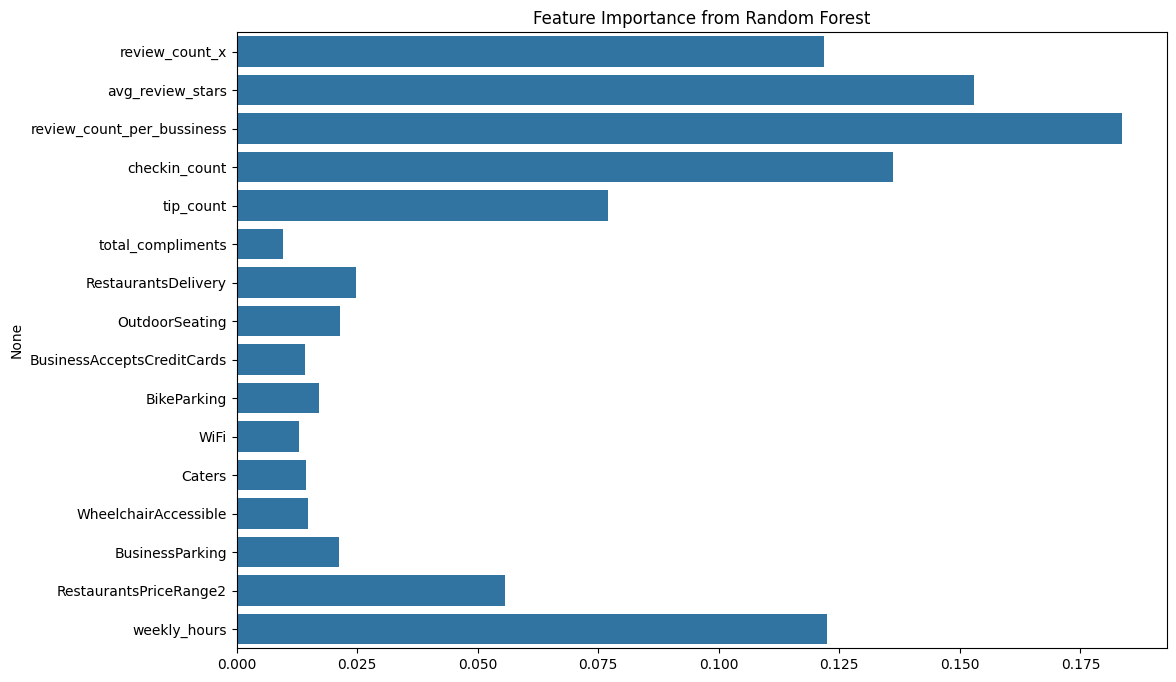

In [65]:
# Get feature importances
importances = feature_imp_rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.show()

In [66]:
Y_test_pred = feature_imp_rf_model.predict(X_test)
Y_val_pred = feature_imp_rf_model.predict(X_val)

In [67]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)

In [68]:
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')

Test Accuracy: 0.8226820586180512
Validation Accuracy: 0.8224572606931417


In [69]:
# Define the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],

}

In [70]:
# Perform grid search with cross-validation on the training set
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search model on the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the validation set using the best model from the grid search or random search
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# Create a confusion matrix for validation set
val_confusion_matrix = confusion_matrix(Y_val, y_val_pred)
print(f"Confusion Matrix: \n{val_confusion_matrix}")


Validation Accuracy: 0.8248187321226634
Confusion Matrix: 
[[ 1594  4534]
 [  733 23205]]


In [72]:
# Predict on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Confusion matrix for the test set
test_confusion_matrix = confusion_matrix(Y_test, y_test_pred)
print(f"Confusion Matrix: \n{test_confusion_matrix}")


Test Accuracy: 0.8242123823147809
Confusion Matrix: 
[[ 1566  4561]
 [  723 23209]]


In [76]:
print(f"Classification Report for Random Forest on Validation Set:")
print(classification_report(Y_val, y_val_pred))

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.69      0.26      0.38      6128
           1       0.84      0.97      0.90     23938

    accuracy                           0.82     30066
   macro avg       0.76      0.61      0.64     30066
weighted avg       0.81      0.82      0.79     30066



In [77]:
print(f"Classification Report for Random Forest on test Set:")
print(classification_report(Y_test, y_test_pred))

Classification Report for Random Forest on test Set:
              precision    recall  f1-score   support

           0       0.68      0.26      0.37      6127
           1       0.84      0.97      0.90     23932

    accuracy                           0.82     30059
   macro avg       0.76      0.61      0.63     30059
weighted avg       0.80      0.82      0.79     30059

